# **Thomson scattering in the Sun**

When an electromagnetic wave hits an electron, it produces a vibration over that electron wich generates a second wave with the same frequency, and therefore, with the same energy, in other direction. That wave, will have a lower intensity once it has been scattered.

**Two conditions** must be met for Thomson scattering taking place:

1.   The **coherence wavelength** of the radiation is small compared with the separation of the particles.
2.   The **energy of the photons** is negligible compared with the rest mass energy of the particles.

*T.A. Howard, S.J. Tappin (Interplanetary Coronal Mass Ejections Observed in the Heliosphere: 1. Review of Theory, 27 May 2009)*

Cross section of the e⁻: **7.95E-30 m²sr-¹**


***Thomson scattering in the solar corona***: we can observe the Thomson scattering phenomenon in the solar corona, where the emitted photosphere photons interact with free plasma electrons of the corona.

## **1. Geometry and Thomson scattering phenomemon**

### 1.1. Definition of the **constants** and **initial parameters**

#### Constants and initial parameters

In [1]:
#from math import *
from matplotlib import pyplot
import numpy as np
import thomsonpy.thomson_scattering.ne_models as ne
import thomsonpy.thomson_scattering.thomson_scattering_tools as thtools
from thomsonpy.thomson_scattering.thomson_scattering_tools import ThomsonGeometry as thgeom
import thomsonpy.config.thomson_scattering_params as tsp
import thomsonpy.constants.universal_constants as uc
import thomsonpy.constants.units as units

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Parameters
I0 = thtools.planck_law(tsp.T_SOL, tsp.WAVELENGTH) # source intensity (Sun)
U = thtools.coef_limb_darkening(tsp.WAVELENGTH) # limb - darkening coefficient.

In [3]:
# Constants
RSOL = thtools.RSOL

#### **Planck's Law:** black body radiation

As a function of the **frequency**, $\nu$:
$$I_\nu = \frac{2 h \nu^3}{c^2}\frac{1}{e^{\frac{h \nu}{k T}}-1}$$

As a function of the **wavelength**, $\lambda$:
$$I_\lambda = \frac{2 h c^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k T}} - 1}$$
Donde:


* $h = 6.62607015·10^{-34} J·s$ Planck's constant.  
* $\nu $ wavelength frequency.
* $k = 1.38·10^{-23}J·K^{-1}$ Boltzmann's constant.
* $c = 3·10^8m·s^{-1}$ speed of light.
* $T = 5778 K$ Sun temperature.

Initial wavelength =  5.e-08
Final wavelength =  2.e-06
Wavelength step =  1.95e-09


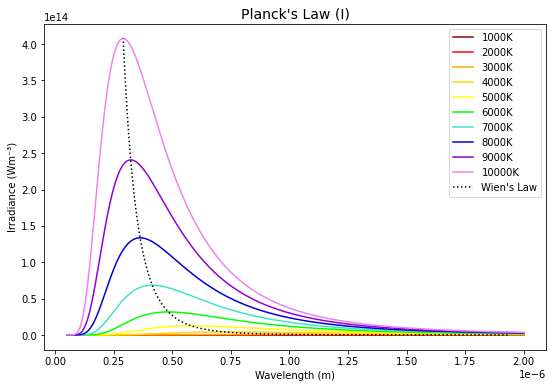

Initial frequency 6.e+15
Final frequency =  1.5e+14
Frequency step =  5.85e+12


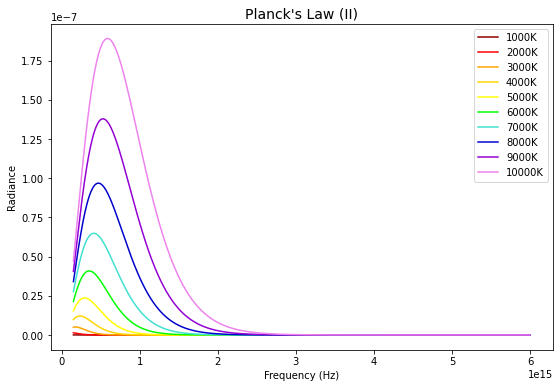

In [4]:
# Temperature values for the black body emission (K).
planck_temperatures = range(1000, 11000, 1000)
# Plot legend configuration.
planck_colors = ['darkred', 'red', 'orange', 'gold', 'yellow', 'lime', 'turquoise', 'mediumblue', 'darkviolet', 'violet']
planck_labels = [str(i) + "K" for i in planck_temperatures]

# Planck's Law as a function of the wavelength.

pyplot.figure(figsize=(9, 6))
pyplot.title("Planck's Law (I)", fontsize=14)
pyplot.xlabel("Wavelength (m)")
pyplot.ylabel("Irradiance (Wm⁻³)")

ini_wavelength = 500E-10 # m
print("Initial wavelength = ", np.format_float_scientific(ini_wavelength))

fin_wavelength = 20000E-10 # m 
print("Final wavelength = ", np.format_float_scientific(fin_wavelength))

wavelength_step = abs(fin_wavelength - ini_wavelength) / 1E3 #10E-10# Angstroms
print("Wavelength step = ", np.format_float_scientific(wavelength_step))

wavelength_values = np.arange(ini_wavelength, fin_wavelength + wavelength_step, wavelength_step)

for i in range(len(planck_temperatures)):
  # It computes the radiance values received as a function of z for a fixed elongation.
  radiance_values = [thtools.planck_law(planck_temperatures[i], j) for j in wavelength_values]
  # It represents the omega values.
  pyplot.plot(wavelength_values, radiance_values, linestyle = '-', color = planck_colors[i], label = planck_labels[i])

# We add Wien's Law.
wien_temperatures = range(1500, 10001)
wien_wavelength_values = [thtools.wien_law(i) for i in wien_temperatures]
wien_values = [thtools.planck_law(i, thtools.wien_law(i)) for i in wien_temperatures]
pyplot.plot(wien_wavelength_values, wien_values, linestyle = ':', color = 'k', label = "Wien's Law")

pyplot.legend()
pyplot.show()

# Planck's Law as a function of the wave frequency.
pyplot.figure(figsize=(9, 6))
pyplot.title("Planck's Law (II)", fontsize=14)
pyplot.xlabel("Frequency (Hz)")
pyplot.ylabel("Radiance")

ini_frequency = uc.c / ini_wavelength 
print("Initial frequency", np.format_float_scientific(ini_frequency))

fin_frequency = uc.c / fin_wavelength
print("Final frequency = ", np.format_float_scientific(fin_frequency))

frequency_step = abs(fin_frequency - ini_frequency) / 1E3
print("Frequency step = ", np.format_float_scientific(frequency_step))

frequency_values = np.arange(fin_frequency, ini_frequency + frequency_step, frequency_step)
#frequency_values = frequency_values[::-1]

for i in range(len(planck_temperatures)):
  # It computes the intensity values as a function of z for a fixed elongation.
  radiance_values = [thtools.planck_law(planck_temperatures[i], j, False) for j in frequency_values]
  # It represents the omega values.
  pyplot.plot(frequency_values, radiance_values, linestyle = '-', color = planck_colors[i], label = planck_labels[i])

pyplot.legend()
pyplot.show()

##### Black body radiation plot

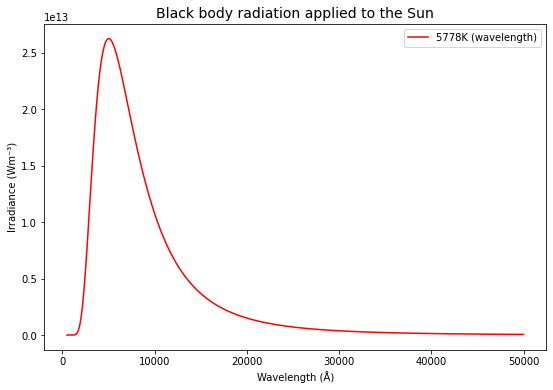

In [5]:
# Planck's Law as a function of the wavelength applied to the Sun.

pyplot.figure(figsize=(9, 6))
pyplot.title("Black body radiation applied to the Sun", fontsize=14)
pyplot.xlabel("Wavelength (Å)")
pyplot.ylabel("Irradiance (Wm⁻³)")

fin_wavelength = 50000E-10 # m 
wavelength_step = 10E-10# m
ini_wavelength = 500E-10 # m
wavelength_values = np.arange(ini_wavelength, fin_wavelength + wavelength_step, wavelength_step)

ini_frequency = uc.c / ini_wavelength 
fin_frequency =  uc.c / fin_wavelength
frequency_step = abs(fin_frequency - ini_frequency) / 1E3
frequency_values = np.arange(fin_frequency, ini_frequency + frequency_step, frequency_step)


# It computes the of the received intensity as a function of z for a fixed elongation.
planck_wavelength_values = [thtools.planck_law(tsp.T_SOL, i) for i in wavelength_values]
planck_frequency_values = [thtools.planck_law(tsp.T_SOL, i, False) for i in frequency_values]

# It represents the omega values.
pyplot.plot([i * 1E10 for i in wavelength_values], planck_wavelength_values, linestyle = '-', color = 'r', label = str(tsp.T_SOL) + "K (wavelength)")
#pyplot.plot([uc.c / i for i in frequency_values], planck_frequency_values, linestyle = '-', color = 'b', label = str(tsp.T_SOL) + "K, (frequency)")

pyplot.legend()
pyplot.show()


## **2. Thomson scattering for a single electron**

### 2.1. van de Hulst coefficients

#### Graphic of the **van de Hulst coefficients**
Representation of the van de Hulst coefficients as a function of the distance, d (Rsol).

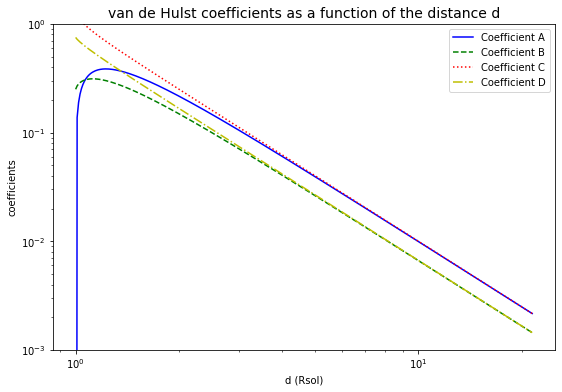

In [6]:
# Graphic of the van de Hulst coefficients as a function of the distance, d (RSol).
pyplot.figure(figsize=(9, 6))
pyplot.title("van de Hulst coefficients as a function of the distance d",fontsize=14)
pyplot.xlabel("d (Rsol)")
pyplot.ylabel("coefficients")

d_values = np.arange(1, 21.49, 0.01) # RSol
d_values_meters = [i * units.RSOL_TO_METERS for i in d_values]
# Computation of the value of the coefficients d(m), I.S.

pyplot.plot(d_values, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'A') for d in d_values_meters], linestyle='-', color='b', label = "Coefficient A")
pyplot.plot(d_values, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'B') for d in d_values_meters], linestyle='--', color='g', label = "Coefficient B")
pyplot.plot(d_values, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'C') for d in d_values_meters], linestyle=':', color='r', label = "Coefficient C")
pyplot.plot(d_values, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'D') for d in d_values_meters], linestyle='-.', color='y', label = "Coefficient D")


pyplot.ylim(0.001, 1)
pyplot.xscale("log")
pyplot.yscale("log")

pyplot.legend()
pyplot.show()

### 2.2. Getting the **intensity components**

#### Graphic of the **evolution of z with the scattering angle (chi)** for fixed d and x values.

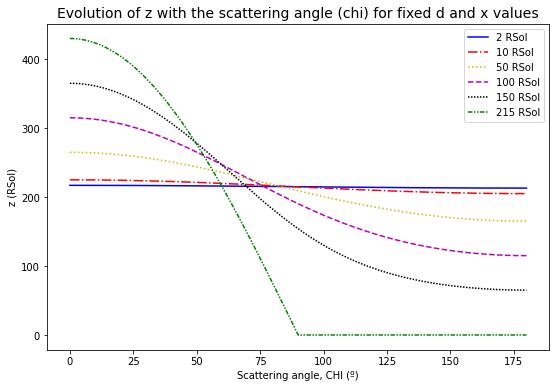

In [7]:
pyplot.figure(figsize=(9, 6))
pyplot.title("Evolution of z with the scattering angle (chi) for fixed d and x values",fontsize=14)
pyplot.xlabel("Scattering angle, CHI (º)")
pyplot.ylabel("z (RSol)")

chi_values = np.radians(np.arange(0, 181))
chi_values_degrees = np.arange(0, 181)

x = tsp.X * units.METERS_TO_RSOL # Rsol
d = [2, 10, 50, 100, 150, 215] # Rsol

styles = ['-', '-.', ':', '--', (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1))]
colors = ['b', 'r', 'y', 'm', 'k', 'g']
labels = [str(i) + " RSol" for i in d]

for k in range(len(d)):
    pyplot.plot(chi_values_degrees, [thgeom.faux_z_intensidad(x, d[k], i) for i in chi_values], 
              linestyle = styles[k], color = colors[k], label = labels[k])

pyplot.legend()
pyplot.show()

#### **Graphics** for the intensity components

##### Graphic of the **Thomson scattering** at **1AU** from the Sun

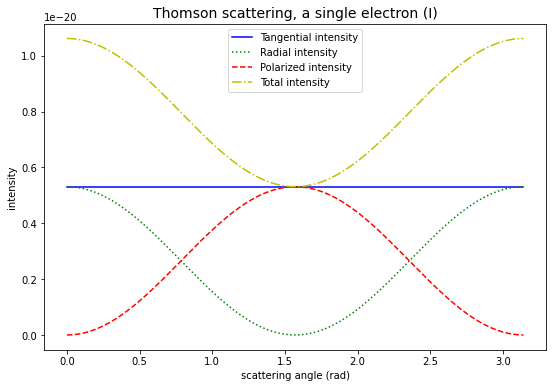

In [8]:
# Graphic of the Thomson scattering at 1AU from the sun centre of the intensity components as functions of the scattering angle.

pyplot.figure(figsize=(9, 6))
pyplot.title("Thomson scattering, a single electron (I)",fontsize=14)
pyplot.xlabel("scattering angle (rad)")
pyplot.ylabel("intensity")

'''
d = 215 * units.RSOL_TO_METERS # m
x = tsp.X # m
print(d, x)
omega = thgeom.faux_omega_d(d, thtools.RSOL) # rad
chi_values = [radians(i) for i in range(0, 89)]

pyplot.plot(chi_values, [thtools.It(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, U) for i in chi_values], linestyle='-', color='b', label = "Tangential intensity")
pyplot.plot(chi_values, [thtools.Ir(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, i, U) for i in chi_values], linestyle=':', color='g', label = "Radial intensity")
pyplot.plot(chi_values, [thtools.Ip(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, i, U) for i in chi_values], linestyle='--', color='r', label = "Polarized intensity")
pyplot.plot(chi_values, [thtools.Itotal(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, i, U) for i in chi_values], linestyle='-.', color='y', label = "Total intensity")
'''

d = 215 * units.RSOL_TO_METERS # m
omega = thgeom.faux_omega_d(d) # rad
chi_values = np.radians(np.arange(0, 181))

pyplot.plot(chi_values, [thtools.It(I0, tsp.SIGMA_E, 1, omega, U) for i in chi_values], linestyle='-', color='b', label = "Tangential intensity")
pyplot.plot(chi_values, [thtools.Ir(I0, tsp.SIGMA_E, 1, omega, i, U) for i in chi_values], linestyle=':', color='g', label = "Radial intensity")
pyplot.plot(chi_values, [thtools.Ip(I0, tsp.SIGMA_E, 1, omega, i, U) for i in chi_values], linestyle='--', color='r', label = "Polarized intensity")
pyplot.plot(chi_values, [thtools.Itotal(I0, tsp.SIGMA_E, 1, omega, i, U) for i in chi_values], linestyle='-.', color='y', label = "Total intensity")


pyplot.legend()
pyplot.show()


##### Graphic of the **Thomson scattering** at **2 Rsol** from the centre of the Sun

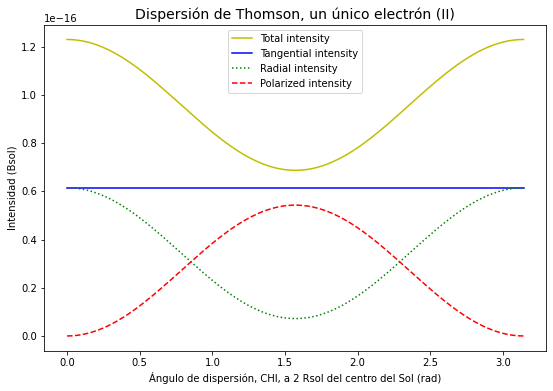

In [9]:
# Gráfico de la dispersión de Thomson a 2 Rsol del centro del Sol de las 
# intensidades total, tangenicial, radial y polarizada en función del 
# ángulo de dispersión, CHI.

pyplot.figure(figsize=(9, 6))
pyplot.title("Dispersión de Thomson, un único electrón (II)",fontsize=14)
pyplot.xlabel("Ángulo de dispersión, CHI, a 2 Rsol del centro del Sol (rad)")
pyplot.ylabel("Intensidad (Bsol)")

x = 1 * units.AU_TO_METERS # m
d = 2 * units.RSOL_TO_METERS # m
omega = thgeom.faux_omega_d(d) # rad
chi_values = np.radians(np.arange(0, 181))

'''
pyplot.plot(chi_values, [thtools.Itotal(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, i, U) for i in chi_values], linestyle='-', color='y', label = "Total intensity")
pyplot.plot(chi_values, [thtools.It(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, U) for i in chi_values], linestyle='-', color='b', label = "Tangential intensity")
pyplot.plot(chi_values, [thtools.Ir(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, i, U) for i in chi_values], linestyle=':', color='g', label = "Radial intensity")
pyplot.plot(chi_values, [thtools.Ip(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, i, U) for i in chi_values], linestyle='--', color='r', label = "Polarized intensity")
'''

pyplot.plot(chi_values, [thtools.Itotal(I0, tsp.SIGMA_E, 1, omega, i, U) for i in chi_values], linestyle='-', color='y', label = "Total intensity")
pyplot.plot(chi_values, [thtools.It(I0, tsp.SIGMA_E, 1, omega, U) for i in chi_values], linestyle='-', color='b', label = "Tangential intensity")
pyplot.plot(chi_values, [thtools.Ir(I0, tsp.SIGMA_E, 1, omega, i, U) for i in chi_values], linestyle=':', color='g', label = "Radial intensity")
pyplot.plot(chi_values, [thtools.Ip(I0, tsp.SIGMA_E, 1, omega, i, U) for i in chi_values], linestyle='--', color='r', label = "Polarized intensity")


pyplot.legend()
pyplot.show()


## **3. Thomson scattering along the line of sight**

### 3.1. Study of the evolution of the parameters needed for the Thomson scattering calculations

In [10]:
# Valores en radianes para las distintas elongaciones a experimentar.
epsilons = [ np.radians(5),  np.radians(20),   np.radians(30),   np.radians(45),   np.radians(60),   np.radians(90),   np.radians(135)] 

# Configuración para la visualización de los gráficos: styles y colors de 
# líneas y labels para la leyenda.
styles = [       ':',              '-',              '--',              '-.',          (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 10))]
colors = [       'm',              'b',              'g',               'r',            'orange',         'brown',            'y']
labels = ['Elongation 5º', "Elongation 20º", "Elongation 30º", "Elongation 45º", "Elongation 60º", "Elongation 90º", "Elongation 135º"]

#### Graphic of the evolution of z as a function of the scattering angle

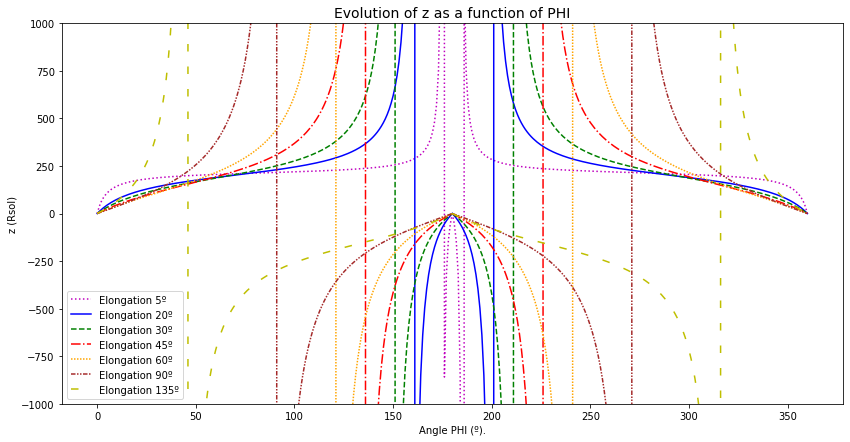

In [11]:
# Graphic of the evolution of z as a function of the scattering angle

pyplot.figure(figsize=(14, 7))
pyplot.title("Evolution of z as a function of PHI", fontsize=14)
pyplot.xlabel("Angle PHI (º).")
pyplot.ylabel("z (Rsol)")

PHI_360 = np.radians(360)
PHI_180 = np.radians(180)
PHI_step = np.radians(1)
PHI_values_180 = np.arange(0, PHI_180 + PHI_step, PHI_step)
PHI_values_360 = np.arange(PHI_180, PHI_360 + PHI_step, PHI_step)

x = tsp.X * units.METERS_TO_RSOL # RSol

for j in range(0, len(epsilons)):
    z_values_180 = [thgeom.faux_z(x, epsilons[j], i) for i in PHI_values_180]
    z_values_360 = [thgeom.faux_z(x, epsilons[j], np.radians(360) - i) for i in PHI_values_360]

    pyplot.plot([np.degrees(i) for i in PHI_values_180], z_values_180, linestyle = styles[j], color = colors[j], label = labels[j])
    pyplot.plot([np.degrees(i) for i in PHI_values_360], z_values_360, linestyle = styles[j], color = colors[j])

pyplot.ylim(-1000, 1000)

pyplot.legend()
pyplot.show()

#### Graphic of the evolution of **omega** as a function of **z**

For an elongation EPSILON = 5.0 º OMEGA has its maximun at x = 214.18 Rsol where OMEGA = 3.06 º
For an elongation EPSILON = 20.0 º OMEGA has its maximun at x = 202.03 Rsol where OMEGA = 0.78 º
For an elongation EPSILON = 30.0 º OMEGA has its maximun at x = 186.2 Rsol where OMEGA = 0.53 º
For an elongation EPSILON = 45.0 º OMEGA has its maximun at x = 152.03 Rsol where OMEGA = 0.38 º
For an elongation EPSILON = 60.0 º OMEGA has its maximun at x = 107.5 Rsol where OMEGA = 0.31 º
For an elongation EPSILON = 90.0 º OMEGA has its maximun at x = 0.0 Rsol where OMEGA = 0.27 º
For an elongation EPSILON = 135.0 º OMEGA has its maximun at x = 0.0 Rsol where OMEGA = 0.27 º


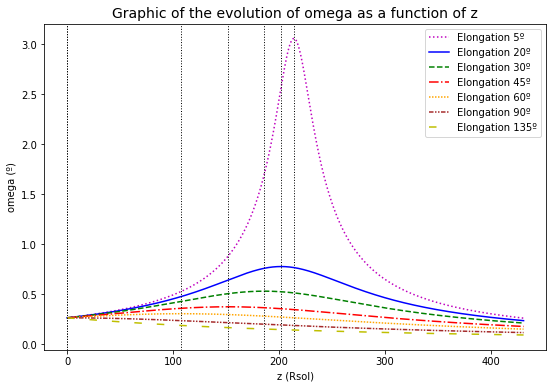

In [12]:
# Graphic of the evolution of **omega** as a function of **z**

pyplot.figure(figsize=(9, 6))
pyplot.title("Graphic of the evolution of omega as a function of z",fontsize=14)
pyplot.xlabel("z (Rsol)")
pyplot.ylabel("omega (º)")

z_values = np.arange(0, 431, 0.01) # RSol
z_values_meters = [i * units.RSOL_TO_METERS for i in z_values] # m
x = tsp.X # m

for j in range(0, len(epsilons)):
    # It computes the omega values as a function of z for a fixed elongation.
    omega_values = [thgeom.faux_omega(x, i, epsilons[j]) for i in z_values_meters]

    # It computes the maximum and its x-coordinate.
    max_omega = max(omega_values)
    z_max = z_values[omega_values.index(max_omega)]

    # It represents the omega values.
    pyplot.plot(z_values, [np.degrees(i) for i in omega_values], linestyle = styles[j], color = colors[j], label = labels[j])

    # It represents the maximum of the omega values.
    pyplot.axvline(z_max, ymin = 0, ymax = 1, linewidth = 1, linestyle = ':', color = 'k')
    print("For an elongation EPSILON =", round(np.degrees(epsilons[j]), 2),
        "º OMEGA has its maximun at x =", round(z_max, 2), 
        "Rsol where OMEGA =", round(np.degrees(max_omega), 2), "º")

pyplot.legend()
pyplot.show()

####Graphic of the **evolution of d as a function of z**

For an elongation EPSILON = 5.0 º d has its minimum at x = 214.18 Rsol where d = 1073.64 Rsol
For an elongation EPSILON = 20.0 º d has its minimum at x = 202.03 Rsol where d = 4213.21 Rsol
For an elongation EPSILON = 30.0 º d has its minimum at x = 186.2 Rsol where d = 6159.3 Rsol
For an elongation EPSILON = 45.0 º d has its minimum at x = 152.03 Rsol where d = 8710.56 Rsol
For an elongation EPSILON = 60.0 º d has its minimum at x = 107.5 Rsol where d = 10668.21 Rsol
For an elongation EPSILON = 90.0 º d has its minimum at x = 1.0 Rsol where d = 12318.73 Rsol
For an elongation EPSILON = 135.0 º d has its minimum at x = 1.0 Rsol where d = 12359.17 Rsol


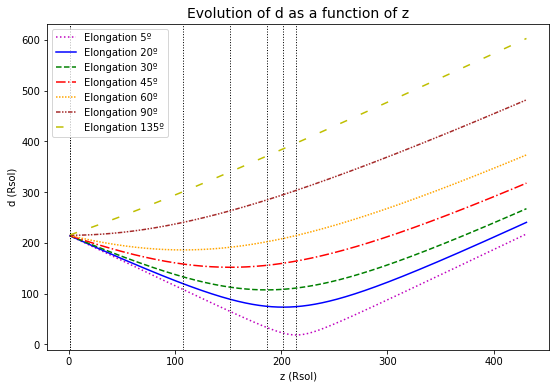

In [13]:
# Graphic of the evolution of d as a function of z.

pyplot.figure(figsize=(9, 6))
pyplot.title("Evolution of d as a function of z", fontsize=14)
pyplot.xlabel("z (Rsol)")
pyplot.ylabel("d (Rsol)")

z_values = np.arange(1, 431, 0.01)
x = tsp.X * units.METERS_TO_RSOL #RSol

for j in range(0, len(epsilons)):
    # It computes the d values for a fixed elongation.
    d_values = [thgeom.faux_d(x, i, epsilons[j]) for i in z_values]
    # It computes the minimum and its x-coordinate.
    min_d = min(d_values)
    z_min = z_values[d_values.index(min_d)]
    # It represents d values.
    pyplot.plot(z_values, d_values, linestyle = styles[j], color = colors[j], label = labels[j])
    # It represents the maximum of the d values.
    pyplot.axvline(z_min, ymin = 0, ymax = 1, linewidth = 1, linestyle = ':', color = 'k')
    print("For an elongation EPSILON =", round(np.degrees(epsilons[j]), 2), "º d has its minimum at x =", round(z_min, 2), "Rsol where d =", round(np.degrees(min_d), 2), "Rsol")

pyplot.legend()
pyplot.show()

### **3.2. Numerical integration**

#### Functions **needed for the integration** in the line of sight

##### **Scattering expressions**
Simplified for the numerical integration

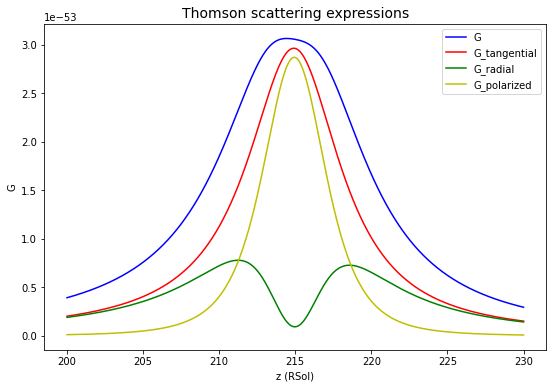

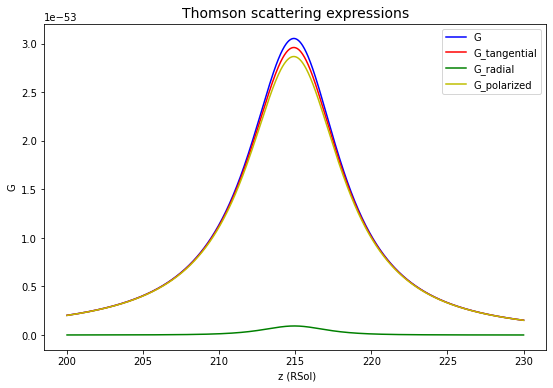

In [14]:
# Graphic of the Thomson scattering expressions.

x = 215 * units.RSOL_TO_METERS # m
z = 230 * units.RSOL_TO_METERS # m
ini_z = 200 * units.RSOL_TO_METERS # m
z_step = abs(z - ini_z) / 1000 # m 
epsilon = np.radians(1)
z_values = np.arange(ini_z, z + z_step, z_step)

pyplot.figure(figsize=(9, 6))
pyplot.title("Thomson scattering expressions", fontsize=14)
pyplot.xlabel("z (RSol)")
pyplot.ylabel("G")

g_values = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in z_values]
g_tangential_values = [thtools.Gt(thgeom.faux_omega(x, i, epsilon), U, i) for i in z_values]
g_radial_values = [thtools.Gr(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in z_values]
g_polarized_values = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in z_values]
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_values, linestyle = '-', color ='b', label = 'G')
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_tangential_values, linestyle = '-', color ='r', label = 'G_tangential')
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_radial_values, linestyle = '-', color ='g', label = 'G_radial')
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_polarized_values, linestyle = '-', color ='y', label = 'G_polarized')

#pyplot.xscale("log")
#pyplot.yscale("log")

pyplot.legend()
pyplot.show()

# Gráfico de expresión de la dispersión de Thomson (Gtotal).

x = 215 * units.RSOL_TO_METERS # m
z = 230 * units.RSOL_TO_METERS # m
ini_z = 200 * units.RSOL_TO_METERS # m
z_step = abs(z - ini_z) / 1000 # m 
epsilon = np.radians(1)
z_values = np.arange(ini_z, z + z_step, z_step)

pyplot.figure(figsize=(9, 6))
pyplot.title("Thomson scattering expressions", fontsize=14)
pyplot.xlabel(" z (RSol)")
pyplot.ylabel("G")

g_values = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in z_values]
g_tangential_values = [thtools.Gt(thgeom.faux_omega(x, i, epsilon), U, i) for i in z_values]
g_radial_values = [thtools.Gr(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in z_values]
g_polarized_values = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in z_values]
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_values, linestyle = '-', color ='b', label = 'G')
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_tangential_values, linestyle = '-', color ='r', label = 'G_tangential')
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_radial_values, linestyle = '-', color ='g', label = 'G_radial')
pyplot.plot([i * units.METERS_TO_RSOL for i in z_values], g_polarized_values, linestyle = '-', color ='y', label = 'G_polarized')

#pyplot.xscale("log")
#pyplot.yscale("log")

pyplot.legend()
pyplot.show()

##### Electron density model

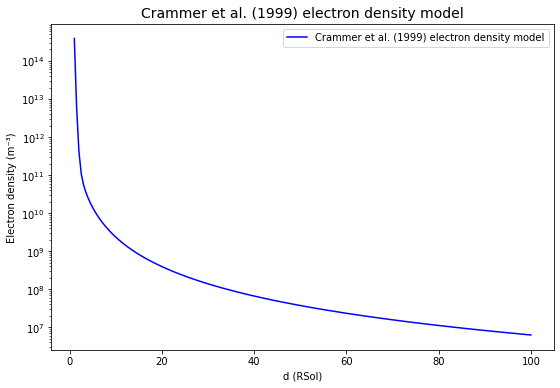

In [15]:
# Graphic of the Crammer et al. (1999) model for the electron density of the Sun.

x = 215 # RSol
d = 100 # RSol
d_step = 0.5 # RSol 
d_values = np.arange(1, d + d_step, d_step)

pyplot.figure(figsize=(9, 6))
pyplot.title("Crammer et al. (1999) electron density model", fontsize=14)
pyplot.xlabel("d (RSol)")
pyplot.ylabel("Electron density (m⁻³)")

ne_values = [ne.crammer_model(i) for i in d_values]
pyplot.plot(d_values, ne_values, linestyle = '-', color ='b', label = "Crammer et al. (1999) electron density model")

pyplot.yscale("log")

pyplot.legend()
pyplot.show()


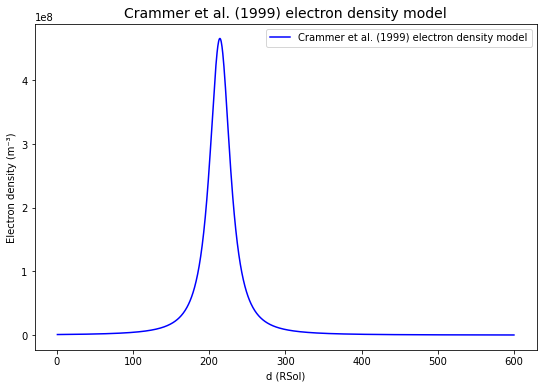

In [16]:
# Graphic of the Crammer et al. (1999) model for the electron density of the Sun.

x = 215 # Rsol
z = 600 # Rsol
z_step = 0.5 # Rsol
z_values = np.arange(1, z + z_step, z_step)

pyplot.figure(figsize=(9, 6))
pyplot.title("Crammer et al. (1999) electron density model", fontsize=14)
pyplot.xlabel("d (RSol)")
pyplot.ylabel("Electron density (m⁻³)")


ne_values = [ne.crammer_model(thgeom.faux_d(x, i, np.radians(5))) for i in z_values]
pyplot.plot(z_values, ne_values, linestyle = '-', color ='b', label = "Crammer et al. (1999) electron density model")

pyplot.legend()
pyplot.show()

#### Numerical integration graphics

##### **Numerical integration** graphic of the line of sight over **z**

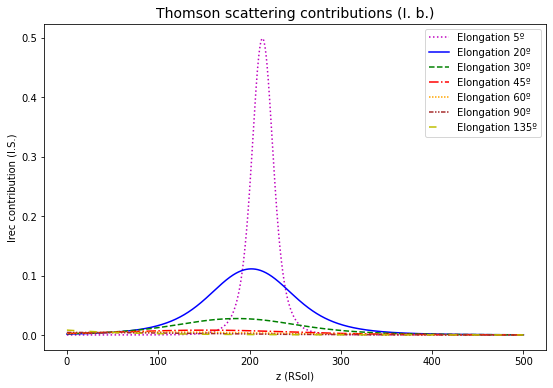

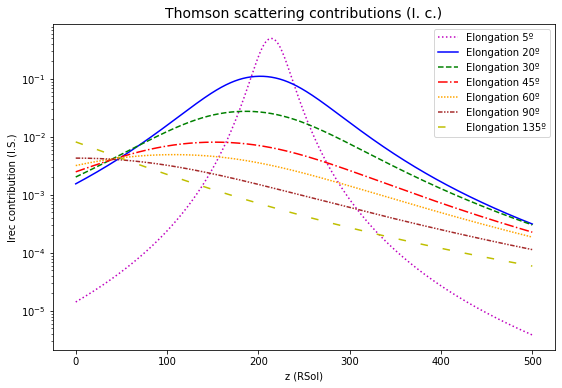

In [17]:
# Numerical integration graphic at 2 AU (430 RSol) of distance z.

## Graphics in the I.S.:

x = tsp.X # m
ini_z = 0 * units.RSOL_TO_METERS # m
fin_z = 500 * units.RSOL_TO_METERS # m
z_step = 0.5 * units.RSOL_TO_METERS # m 
z_values = np.arange(ini_z, fin_z + z_step, z_step)

### Graphic without logarithmic scale (meters).

pyplot.figure(figsize=(9, 6))
pyplot.title("Thomson scattering contributions (I. b.)", fontsize=14)
pyplot.xlabel("z (RSol)")
pyplot.ylabel("Irec contribution (I.S.)")

for j in range(0, len(epsilons)):
    # It computes the received intensity as a function of z for a fixed elongation
    irec_value =  thtools.Irec_z(x, epsilons[j], ini_z, fin_z, z_step, U)
    f_irec_values = [thtools.f_Irec_z(x, epsilons[j], i, U) / irec_value for i in z_values]
    # It represents the values of the contributions
    pyplot.plot(z_values * units.METERS_TO_RSOL, f_irec_values, linestyle = styles[j], color = colors[j], label = labels[j])

pyplot.legend()
pyplot.show()

### Graphic with logarithmic scale (meters).

pyplot.figure(figsize=(9, 6))
pyplot.title("Thomson scattering contributions (I. c.)", fontsize=14)
pyplot.xlabel("z (RSol)")
pyplot.ylabel("Irec contribution (I.S.)")

for j in range(0, len(epsilons)):
    # It computes the received intensity as a function of z for a fixed elongation
    irec_value =  thtools.Irec_z(x, epsilons[j], ini_z, fin_z, z_step, U)
    f_irec_values = [thtools.f_Irec_z(x, epsilons[j], i, U) / irec_value for i in z_values]
    # It represents the values of the contributions
    pyplot.plot(z_values * units.METERS_TO_RSOL, f_irec_values, linestyle = styles[j], color = colors[j], label = labels[j])

pyplot.yscale("log")

pyplot.legend()
pyplot.show()

## **4. Model of the K-corona**

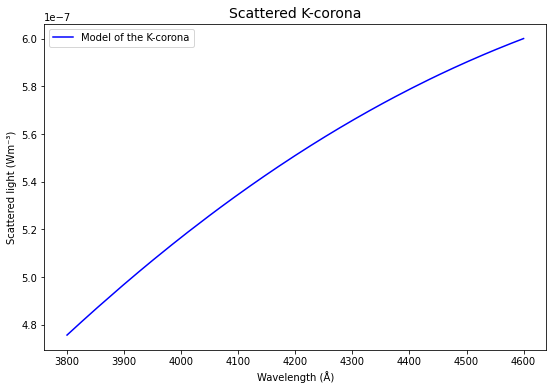

In [21]:
pyplot.figure(figsize=(9, 6))
pyplot.title("Scattered K-corona", fontsize=14)
pyplot.xlabel("Wavelength (Å)")
pyplot.ylabel("Scattered light (Wm⁻³)")

x = 215 * units.RSOL_TO_METERS # m
fin_wavelength = 4600E-10 # m
ini_wavelength = 3800E-10 # m
num_points = 5000
ini_z = 212 * units.RSOL_TO_METERS # m
fin_z = 218 * units.RSOL_TO_METERS # m 
z_step = 0.25 * units.RSOL_TO_METERS # m
epsilon = tsp.EPSILON # rad

wavelength_values = np.linspace(ini_wavelength, fin_wavelength, num_points)
scattered_light_values = []

wavelength_4000 = thtools.get_scattered_light(4000E-10, tsp.T_SOL, x, epsilon, ini_z, fin_z, z_step)

# It computes the received intensity.
for i in wavelength_values:
    scattered_light = thtools.get_scattered_light(i, tsp.T_SOL, x, epsilon, ini_z, fin_z, z_step)
    scattered_light_norm = scattered_light #/ wavelength_4000
    scattered_light_values.append(scattered_light_norm)

# It represents the omega values.
pyplot.plot([i * 1E10 for i in wavelength_values], scattered_light_values, linestyle = '-', color = 'b', label = 'Model of the K-corona')

pyplot.legend()
pyplot.show()

In [22]:
U = thtools.coef_limb_darkening(4000E-10)
print(thtools.planck_law(tsp.T_SOL, 4000E-10))
print(thtools.Irec_z(x, epsilon, ini_z, fin_z, z_step, U))
print(thtools.get_scattered_light(4000E-10, tsp.T_SOL, x, epsilon, ini_z, fin_z, z_step))

22927270278457.13
2.2534120348956848e-20
5.166458677278143e-07
